#Taller 1_Grupo 5
###Integrantes:
#####Daniel Steven Lozada - 1010148612
#####Federico Lopez - 1002576446
#####Santiago Erazo Mora - 1082658664

In [1]:
!pip install lcapy==1.14
!pip install folium==0.2.1
!pip install pdflatex
!sudo apt-get install texlive-latex-recommended 
!sudo apt install texlive-latex-extra
!sudo apt install dvipng
!pip install control
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-recommended is already the newest version (2019.20200218-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
texlive-latex-extra is already the newest version (2019.202000218-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
dvipng is already the newest version (1.15-1.1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Looking in indexes: https://p

In [2]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma
from lcapy import Circuit, j , omega, s
from lcapy import *

from scipy.signal import lti
from scipy.stats import expon
import scipy.fftpack as fourier
from scipy.fftpack import fft,fftfreq,fftshift
import seaborn as sns  ##HISTOGRAMAS
from numpy import logspace
import sympy as sym

In [3]:
ctt=Circuit(
"""
    Vi 1 0_1 step;down
    C1 1 2; right, size=1.5
    R1 2 0; down, size=1.5
    R2 2 3; right, size=1.5
    C2 3 0_2; right, size=1.5
    
    
    W 0_1 0;right
    W 0 0_2;right
    

"""
)

In [4]:
H=(ctt.C2.V(s)/ctt.Vi.V(s)).simplify()
H

                   C₁⋅R₁⋅s                    
──────────────────────────────────────────────
             2                                
C₁⋅C₂⋅R₁⋅R₂⋅s  + s⋅(C₁⋅R₁ + C₂⋅R₁ + C₂⋅R₂) + 1

In [5]:
C1=4.7e-4
C2=4.7e-4
R1=2000
R2=2000

Coeficientes_num=[C1*R1,0]
Coeficientes_dem=[C1*C2*R2*R1,C1*R1+C2*R1+C2*R2,1]

In [6]:
import control

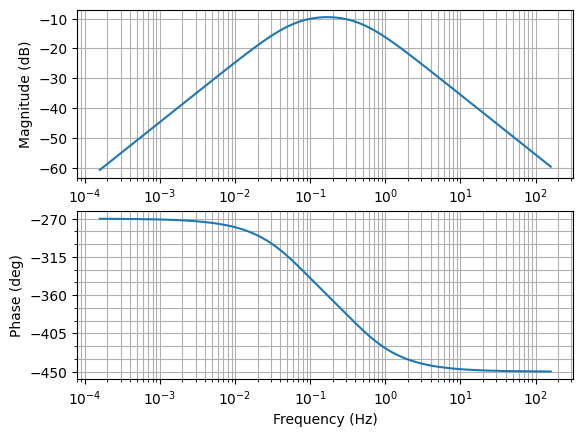

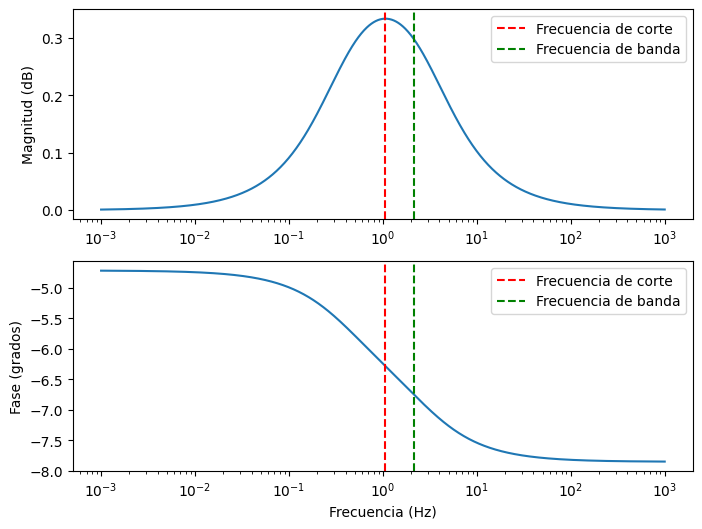

In [7]:
sys = control.TransferFunction(Coeficientes_num, Coeficientes_dem)  # Crear el sistema LTI
dt = 0.1  # Base de tiempo deseada en segundos
sys_d = control.c2d(sys, dt)

# Definir el rango de frecuencias
omega = np.logspace(-3, 3, num=1000)

# Obtener la respuesta en frecuencia
mag, phase, omega = control.bode(sys, omega, dB=True, Hz=True)

f0 = 1/(np.sqrt(C1*C2*R1*R2))
B = 1 / (R1 * C1) + 1 / (R2 * C2)

# Graficar la respuesta en frecuencia
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))
ax1.semilogx(omega, mag)
ax1.set_ylabel('Magnitud (dB)')
ax1.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax1.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax1.legend()

ax2.semilogx(omega, phase)
ax2.set_xlabel('Frecuencia (Hz)')
ax2.set_ylabel('Fase (grados)')
ax2.axvline(f0, color='red', linestyle='--', label='Frecuencia de corte')
ax2.axvline(B, color='green', linestyle='--', label='Frecuencia de banda')
ax2.legend()

plt.show()

In [8]:
print(sys_d)


 0.09091 z - 0.09091
----------------------
z^2 - 1.717 z + 0.7268

dt = 0.1



/usr/local/lib/python3.10/dist-packages/control/lti.py:181: UserWarning: __call__: evaluation above Nyquist frequency
  warn("__call__: evaluation above Nyquist frequency")


(array([0.00938825, 0.00947515, 0.00956285, 0.00965137, 0.0097407 ,
        0.00983086, 0.00992185, 0.01001369, 0.01010637, 0.01019991,
        0.01029431, 0.01038959, 0.01048574, 0.01058279, 0.01068073,
        0.01077958, 0.01087934, 0.01098002, 0.01108163, 0.01118418,
        0.01128768, 0.01139213, 0.01149755, 0.01160394, 0.01171132,
        0.01181969, 0.01192905, 0.01203943, 0.01215083, 0.01226325,
        0.01237672, 0.01249123, 0.01260679, 0.01272343, 0.01284114,
        0.01295994, 0.01307983, 0.01320083, 0.01332295, 0.01344619,
        0.01357057, 0.0136961 , 0.01382279, 0.01395065, 0.01407968,
        0.01420991, 0.01434133, 0.01447397, 0.01460783, 0.01474293,
        0.01487927, 0.01501686, 0.01515573, 0.01529588, 0.01543731,
        0.01558005, 0.01572411, 0.01586949, 0.01601622, 0.01616429,
        0.01631373, 0.01646455, 0.01661675, 0.01677035, 0.01692537,
        0.01708182, 0.01723971, 0.01739905, 0.01755985, 0.01772214,
        0.01788592, 0.01805121, 0.01821801, 0.01

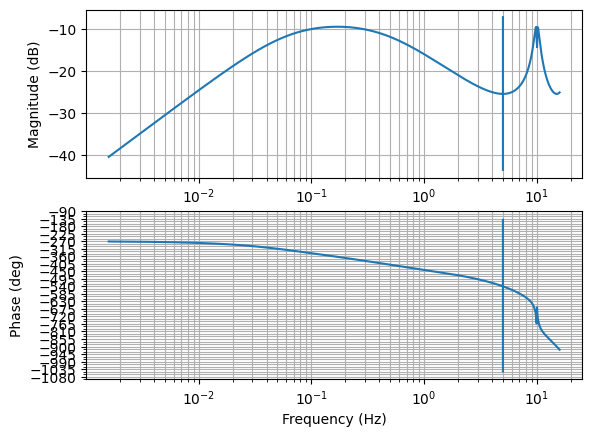

In [9]:
# Ajustar el rango de frecuencias
frequencies = np.logspace(-2, 2, num=1000)  # Generar una lista de frecuencias en escala logarítmica

# Graficar la respuesta en frecuencia
control.bode_plot(sys_d, omega=frequencies, dB=True, Hz=True)

#### 1. Señal aleatoria Gaussiana

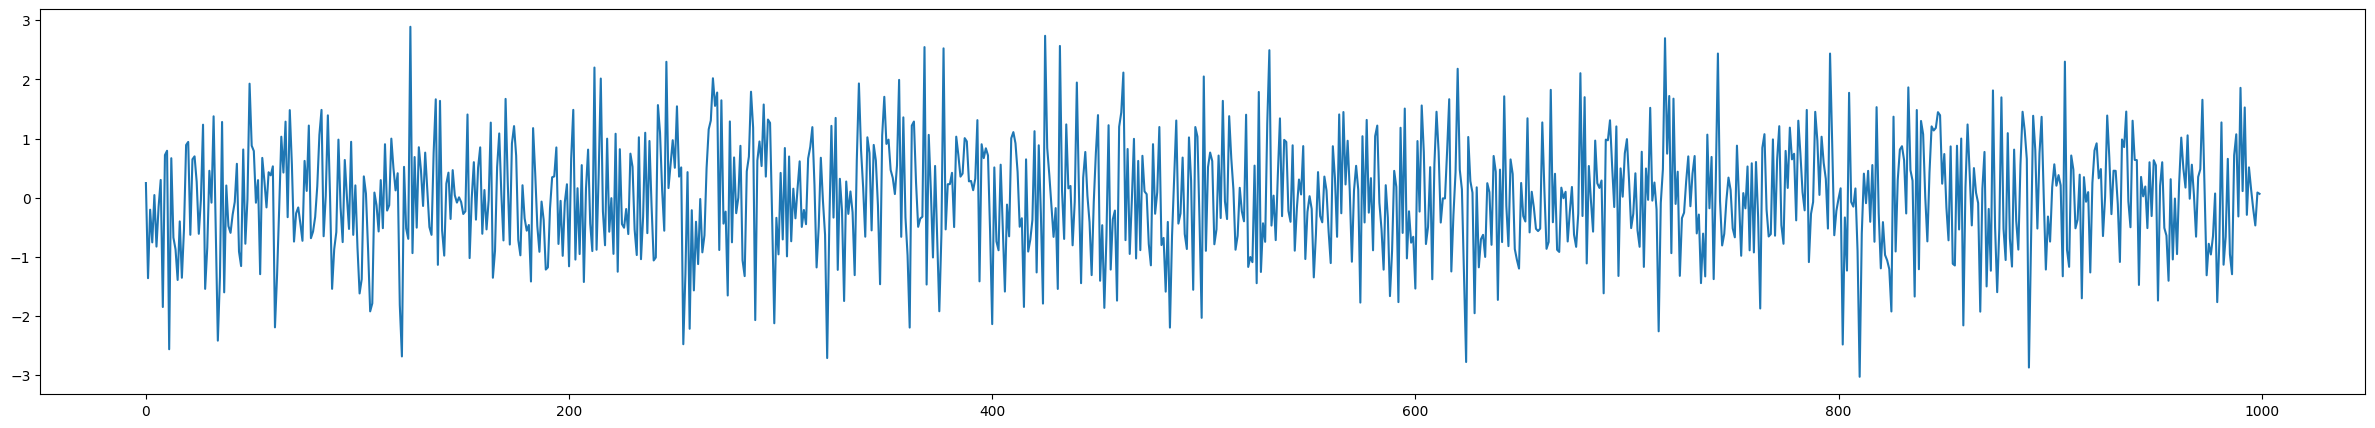

In [10]:
t1=np.arange(-50,50,dt)
dt = 0.1
media=0
varianza=1
GWN=np.random.normal(media,varianza,len(t1))
plt.figure(figsize=(30,5))
plt.plot(GWN)




<ipython-input-11-0db795620a57>:21: ComplexWarning: Casting complex values to real discards the imaginary part
  espectro[i] = np.fft.fftshift(np.fft.fft(correlacion))


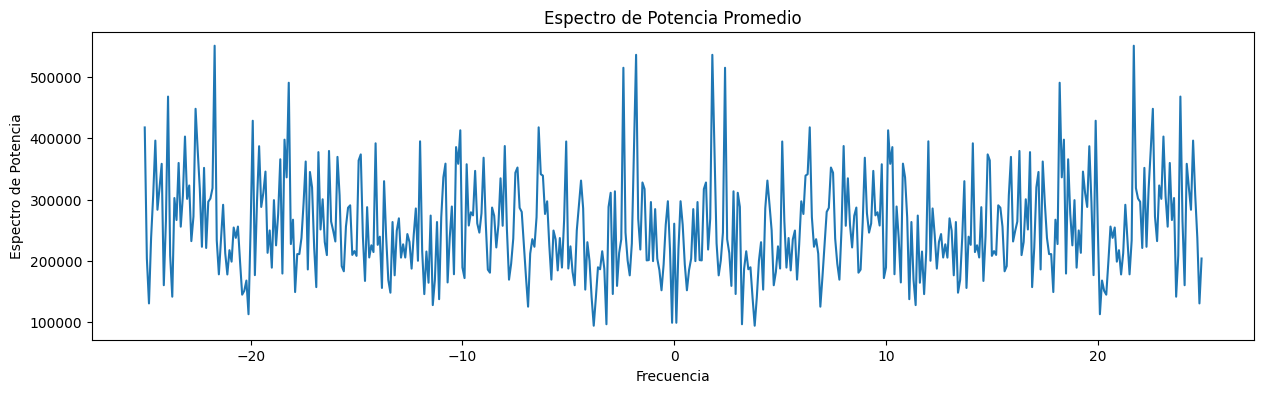

In [11]:
import numpy as np
import matplotlib.pyplot as plt

media = 0
varianza = 1
dt = 0.1
t1 = np.arange(-25, 25, dt)

num_señales = 30
num_correlacion = 30
num_espectros = 30

señales = np.zeros((num_señales, len(t1)))
corr = np.zeros((num_correlacion, len(t1)))
espectro = np.zeros((num_espectros, len(t1)))

for i in range(num_espectros):
    #GWN = np.random.normal(media, varianza, len(t1))
    señales[i] = np.random.normal(media, varianza, len(t1))
    correlacion = np.correlate(señales[i], señales[i], mode='same')
    espectro[i] = np.fft.fftshift(np.fft.fft(correlacion))

media_espectro = np.mean(np.abs(espectro), axis=0)
espectro_potencia = np.abs(media_espectro) ** 2


media_señx30 = np.mean(np.abs(señales), axis=0)

# Graficar el espectro de potencia
plt.figure(figsize=(15, 4))
plt.plot(t1, espectro_potencia)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia Promedio')
plt.show()




#### Señales pasadas por el circuito

In [12]:
# Simular la respuesta del sistema a la señal de entrada x30
t_out, resp_x30 = control.forced_response(sys_d, T=t1, U=media_señx30)

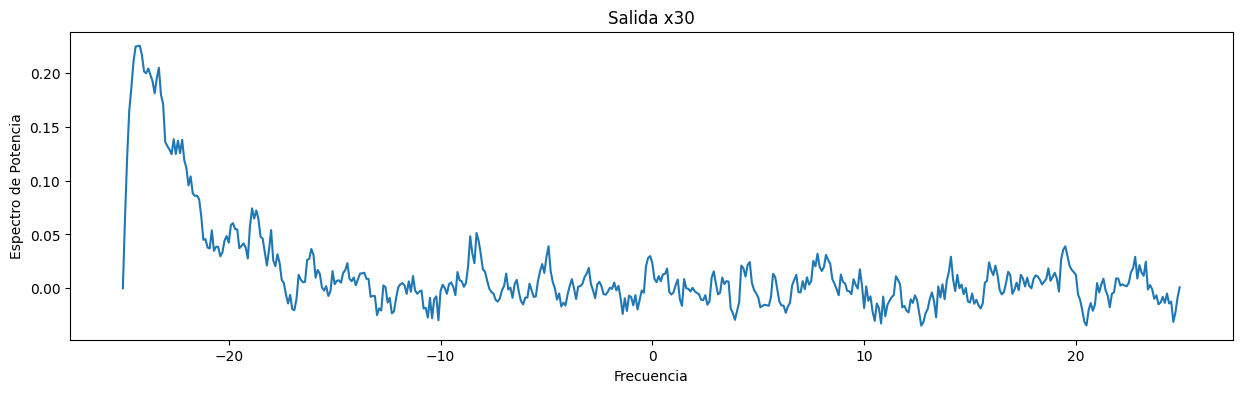

In [13]:
plt.figure(figsize=(15, 4))
plt.plot(t1, resp_x30)

plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Salida x30')
plt.show()


In [14]:
X_train = media_señx30.reshape(-1, 1)  # La señal gaussiana como datos de entrada
Y_train = np.array(resp_x30)  

In [18]:


from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Crear modelo en Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    tf.keras.layers.Dense(750, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(500, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(250, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(100, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(50, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(25, activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compilar modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00011),
              loss='mse', metrics='accuracy')

Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)?   ERROR: Operation cancelled by user
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Operation cancelled by user


AttributeError: ignored

In [ ]:
# Entrenar el modelo
history=model.fit(X_train, Y_train, epochs=100, batch_size=32,  validation_split=0.2)

train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
# Evaluar modelo en conjunto de prueba
test_loss = model.evaluate(X_train, Y_train, verbose=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def square_pulse(t, duty_cycle):
    period = 1 / duty_cycle
    return np.where((t % period) < (period / 2), 1, -1)

# Parámetros del pulso cuadrado
dt = 0.01
media = 0
varianza = 1
duty_cycle = 0.05  # Ciclo de trabajo del pulso (0.5 = 50% de alta y 50% de baja)

# Crear vector de tiempo
t1 = np.arange(-25,25, dt)

# Generar pulso cuadrado
pulse = square_pulse(t1, duty_cycle)

# Graficar el pulso cuadrado
plt.figure(figsize=(10, 5))
plt.plot(t1, pulse)
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Pulso Cuadrado')
plt.grid(True)
plt.show()


In [ ]:
convolution = np.convolve(pulse, media_señx30, mode='same')

In [ ]:
Y_pred = model.predict(convolution)
print("Test loss:", test_loss)

In [ ]:
plt.plot(Y_pred)
plt.title("Salida de prom señal x30")
plt.xlabel("")
plt.ylabel("")
plt.show()

In [ ]:
correlacion = np.correlate(np.ravel(Y_pred), np.ravel(Y_pred), mode='same')
fft_result = np.fft.fft(correlacion)
espectro_potencia = np.abs(fft_result) ** 2
frecuencias = np.fft.fftfreq(len(Y_pred))

plt.plot(frecuencias, espectro_potencia)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia de la Señal')
plt.grid(True)
plt.show()


correlacion = np.correlate(np.ravel(Y_pred), np.ravel(Y_pred), mode='same')
plt.plot(correlacion)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('funcion de correlacion')
plt.grid(True)
plt.show()

In [ ]:
from scipy import signal as sg
import numpy as np
import matplotlib.pyplot as plt

media = 0
varianza = 1
dt = 0.1
t1 = np.arange(-25, 25, dt)

num_señales = 30
num_correlacion = 30
num_espectros = 30
num_señal=30


señales = np.zeros((num_señales, len(t1)))
corr = np.zeros((num_correlacion, len(t1)))
espectro = np.zeros((num_espectros, len(t1)))
Pxx_den = np.zeros((num_señal, len(t1)))


for i in range(num_espectros):
    GWN = np.random.normal(media, varianza, len(t1))
    correlacion = np.correlate(GWN, GWN, mode='same')
    espectro[i] = np.fft.fftshift(np.fft.fft(correlacion))
    corr[i] = correlacion

 

media_espectro1 = np.mean(np.abs(espectro), axis=0)
espectro_potencia = np.abs(media_espectro1) ** 2

# Graficar el espectro de potencia
plt.figure(figsize=(15, 4))
plt.plot(t1, media_espectro1)

plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.ylim(0,2500)
plt.xlim(-5,5)
plt.title('Espectro de Potencia Promedio')
plt.show()

In [ ]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

media = 0
varianza = 1
dt = 0.1
t1 = np.arange(-25, 25, dt)

num_señales = 30
num_correlacion = 30
num_señal = 30

señales = np.zeros((num_señales, len(t1)))
corr = np.zeros((num_correlacion, len(t1)))
espectros = []

for i in range(num_señales):
    GWN = np.random.normal(media, varianza, len(t1))
    correlacion = np.correlate(GWN, GWN, mode='same')
    espectro_frecuencia, espectro_potencia = signal.welch(GWN, fs=len(t1))

    señales[i] = GWN
    corr[i] = correlacion
    espectros.append(espectro_potencia)

media_espectro = np.mean(np.array(espectros), axis=0)

# Interpolación para obtener 500 puntos en el eje de frecuencia
f_interp = np.linspace(espectro_frecuencia[0], espectro_frecuencia[-1], 500)
media_espectro_interp = np.interp(f_interp, espectro_frecuencia, media_espectro)

# Graficar el espectro de potencia promedio
plt.figure(figsize=(15, 4))
plt.plot(f_interp, media_espectro_interp)
plt.xlabel('Frecuencia')
plt.ylabel('Espectro de Potencia')
plt.title('Espectro de Potencia Promedio')
plt.show()

# Verificar la longitud de media_espectro_interp
print(media_espectro_interp.shape)